imports

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris


Loading the Dataset
For learning classification, the Iris dataset is often used as a simple example. It contains measurements of flowers and is categorized into three classes (species of flowers). Scikit-learn provides built-in datasets, including Iris.

In [15]:
data = load_iris()
X = data.data  # Features
y = data.target  # Labels (target classes)

# Convert to DataFrame for better understanding
df = pd.DataFrame(X, columns=data.feature_names)
df['species'] = pd.Categorical.from_codes(y, data.target_names)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Split Data into Training and Testing Sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train and Evaluate Classification Models
Now, let's train and evaluate different classification algorithms: Logistic Regression, SVM, Random Forest, and k-NN.

Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))


Logistic Regression Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Support Vector Machine (SVM)

In [18]:
from sklearn.svm import SVC

svm = SVC()

svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



K-Nearest Neighbors (k-NN)

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("k-NN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


k-NN Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Visualize Results
You can also visualize the decision boundaries of each classifier to understand how they separate different classes.

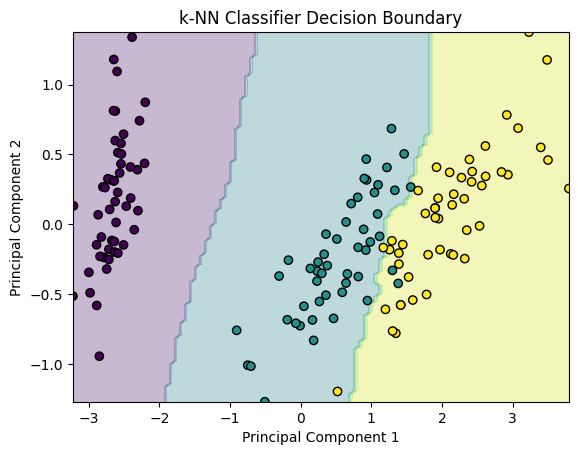

In [ ]:
from sklearn.decomposition import PCA

# Reduce the dataset to two features for visualization (using PCA)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Split the reduced data into training and testing
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Train k-NN as an example and plot decision boundaries
knn = KNeighborsClassifier()
knn.fit(X_train_reduced, y_train)

# meshgrid for plotting decision boundaries
xx, yy = np.meshgrid(np.linspace(X_reduced[:, 0].min(), X_reduced[:, 0].max(), 100),
                     np.linspace(X_reduced[:, 1].min(), X_reduced[:, 1].max(), 100))

# Predict on the grid to get the decision boundary
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot for decision boundary 
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolors='k', marker='o')
plt.title("k-NN Classifier Decision Boundary")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


Model Comparison

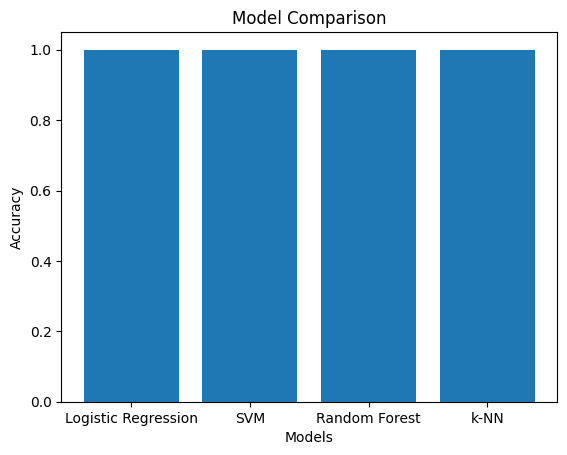

In [22]:
models = ['Logistic Regression', 'SVM', 'Random Forest', 'k-NN']
accuracies = [
    accuracy_score(y_test, y_pred_log_reg),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_knn)
]

plt.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()
